**Name:** Bala Guga Gopal S

**Batch:**  R2

**Date:** 04 Feb 2022

**Experiment Name:**  Final Review Term Work

# Custom object detection for Edge Devices

An object detection model is trained to detect the presence and location of multiple classes of objects. For example, a model might be trained with images that contain various pieces of fruit,animals along with a label that specifies the class of fruit/animal they represent (e.g. cat or dog), and data specifying where each object appears in the image.

When an image is subsequently provided to the model, it will output a list of the objects it detects, the location of a bounding box that contains each object, and a score that indicates the confidence that detection was correct.

Microcontrollers/Edge devices are typically small, low-powered computing devices that are embedded within hardware that requires basic computation. By bringing machine learning to tiny microcontrollers, we can boost the intelligence of billions of devices that we use in our lives, including household appliances and Internet of Things devices, without relying on expensive hardware or reliable internet connections, which is often subject to bandwidth and power constraints and results in high latency. This can also help preserve privacy, since no data leaves the device.

***The whole work consolidated with all the data's is hosted in the Github repo stated below***

https://github.com/Bggopal/Custom_object_detection_for_edgedevices.git

# Script Description

In this script the custom object detection of using TF is studied and implemented, by using and applying the Transferlearning Technique

Pipelining of the Script 
1. Preparing the workspace
2. Installing the dependencies ( Tensorflow, Tensorflow-gpu, Tensorflow-Object detection API, Installing COCO-API)
3. Finding and Annotating the DATASET using labelImg tool
4. Creating a Labelmap.pbtxt and coversion of TFrecord format from .xml  
5. Downloading the Tensorflow model pretrained model,
6. Configuring custom model from pretrained Model (using pipeline.config file)
7. Training the model 
8. Evaluate the model
9. Exporting a Trained Model
10. Test the model(running the inference)
11. TFLITE conversion
12. C array Conversion
13. References
14. Conclusion(Final INFERENCES and FOLLOWUPS to the project)

Note: 

Throughout the script a folder structure is maintained, inside which all the files are held.

# Importing Gdrive to the script

In [ ]:
#Importing the gdrive as the workspace was created using the gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Folder for the workspace
%cd '/content/gdrive/MyDrive/Termwork'

/content/gdrive/MyDrive/Termwork


# Installing tensorflow-gpu

In [ ]:
#pip install tensorflow-gpu
!pip install tensorflow-gpu

In [ ]:
# checking version of tensorflow
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.7.0
/device:GPU:0


In [ ]:
# For tensorflow 2: checking the available gpus(set the runtime in colab in as GPU)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
tf.test.is_gpu_available(
  cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Installing Object detection API

1. By cloning the tf2 git repo, the object detection api can be used.
2. The Tensorflow Object Detection API uses Protobufs to configure model and training parameters. Before the framework can be used, the Protobuf libraries must be downloaded and compiled.



In [ ]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
    while "models" in pathlib.Path.cwd().parts:
        os.chdir('..')
elif not pathlib.Path('models').exists():
    !git clone --depth 1 https://github.com/tensorflow/models


Cloning into 'models'...
remote: Enumerating objects: 3157, done.
remote: Counting objects: 100% (3157/3157), done.
remote: Compressing objects: 100% (2491/2491), done.
remote: Total 3157 (delta 836), reused 1499 (delta 622), pack-reused 0
Receiving objects: 100% (3157/3157), 33.37 MiB | 11.41 MiB/s, done.
Resolving deltas: 100% (836/836), done.
Checking out files: 100% (2882/2882), done.


In [ ]:
# installing dependencies
!pip install pycocotools

In [ ]:
pwd

'/content/gdrive/MyDrive/Termwork'

In [ ]:
#Installing the objectdetection API

%cd 'models/research/'
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python3 -m pip install .

[Errno 2] No such file or directory: 'models/research/'
/content/gdrive/MyDrive/Termwork/models/research
Processing /content/gdrive/MyDrive/Termwork/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.9 MB 20.0 MB/s 
     |████████████████████████████████| 352 kB 62.1 MB/s 
     |████████████████████████████████| 1.8 MB 55.3 MB/s 
     |████████████████████████████████| 23.1 MB 1.5 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 596 kB 65.0 MB/s 
     |████████████████████████████████| 90 kB 9.4 MB/s 
     |███████████████████████████████

In [ ]:
pwd

'/content/gdrive/MyDrive/Termwork/models/research'

**Verifying the installation of the Object detection API using the reference script**

In [ ]:
!python3 object_detection/builders/model_builder_tf2_test.py

2022-02-03 16:56:35.274314: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0203 16:56:36.262895 140005424719744 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.55s
I0203 16:56:36.828237 140005424719744 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.55s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.43s
I0203 16:56:38.257749 140005424719744 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_cr

# Dataset download

The cat and dog dataset for object detection was downloaded from kaggle

Link - https://www.kaggle.com/tarunbisht11/yolo-animal-detection-small

1,100 JPG files of cats, dogs and monkey, if a proportion of 50% percent of each class. Also, all the images have a respective XML file, witch cotains the labels itself, created using the LabelImage software 

In [ ]:
# Configure Working directory to for Kaggle Json image (important to download the dataset from Kaggle to google drive via colab)
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Termwork/Kaggle"

In [ ]:
pwd # current working directory

'/content/gdrive/MyDrive/Termwork'

In [ ]:
if "dataset" in pathlib.Path.cwd().parts:
    while "dataset" in pathlib.Path.cwd().parts:
        os.chdir('..')
elif not pathlib.Path('dataset').exists():
    !kaggle datasets download -d tarunbisht11/yolo-animal-detection-small

 79% 24.0M/30.4M [00:01<00:00, 11.5MB/s]
100% 30.4M/30.4M [00:01<00:00, 19.7MB/s]


In [ ]:
# Unzip the folders and to delete the .zip file.
!unzip \*.zip  && rm *.zip

# Annotating the Images

LabelIMG is the tool used here to Annotate the Images . LabelImg is a graphical image annotation tool.

It is written in Python and uses Qt for its graphical interface.

Annotations are saved as XML files in PASCAL VOC format, the format used by ImageNet. Besides, it also supports YOLO and CreateML formats.

Found in - https://github.com/tzutalin/labelImg

And installation to local machine can be done using pip installation 

Note: 
1. Few images were annotated and remaining were used from pre-annotated dataset
2. Here the images were annotated in local machine and moved to the cloud directory

In [ ]:
# installing the tool
%cd '/content/gdrive/MyDrive/Termwork/'
!pip3 install labelImg

**Note: this particular cell was executed and images were annotated in the local machine.**

![image](https://user-images.githubusercontent.com/59637425/152473921-037ce61d-bef0-4d51-aa55-3301699e979b.png)


# Partinion the dataset

In [ ]:
!python3 partition_dataset.py -x -i "/content/gdrive/MyDrive/Termwork/dataset" -r 0.1

will create a folder named 'test' and 'train' under dataset directroy which will have a split of images in the ratio 90%:10%

# Label map creation

Now that the data set is annotated into two classes for training purpose, we create a label map image . As the number classes are three (cat, dog and monkey) three id's were created and was stored with a extension **label_map.pbtxt**

In [ ]:
%cd  '/content/gdrive/MyDrive/Termwork/dataset'

/content/gdrive/MyDrive/Termwork/dataset


In [ ]:
!cat label_map.pbtxt

item {
  id: 1
  name: 'cat'
}

item {
  id: 2
  name: 'dog'
}

item {
  id: 3
  name: 'monkey'
}

# Conversion of TF records

The generate_tfrecord.py (inside the scripts folder) is utilized to iterate over all the .xml files in the train and test folders, and convert them to tfrecord. Thus the process is automated. and the created images are recorded.

In [ ]:
%cd '/content/gdrive/MyDrive/Termwork/Scripts'

/content/gdrive/MyDrive/Termwork/Scripts


In [ ]:
# Create train data:
!python3 generate_tfrecord.py -x /content/gdrive/MyDrive/Termwork/dataset/train -l /content/gdrive/MyDrive/Termwork/dataset/label_map.pbtxt -o /content/gdrive/MyDrive/Termwork/Annotations/train.record


Traceback (most recent call last):
  File "generate_tfrecord.py", line 172, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "generate_tfrecord.py", line 162, in main
    tf_example = create_tf_example(group, path)
  File "generate_tfrecord.py", line 116, in create_tf_example
    encoded_jpg = fid.read()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/lib/io/file_io.py", line 118, in read
    self._preread_check()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/lib/io/file_io.py", line 81, in _preread_check
    compat.path_to_str(self.__name), 1024 * 512)
tensorflow.python.framework.erro

In [ ]:
# Create test data:
!python3 generate_tfrecord.py -x /content/gdrive/MyDrive/Termwork/dataset/test -l /content/gdrive/MyDrive/Termwork/dataset/label_map.pbtxt -o /content/gdrive/MyDrive/Termwork/Annotations/test.record

Traceback (most recent call last):
  File "generate_tfrecord.py", line 172, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "generate_tfrecord.py", line 162, in main
    tf_example = create_tf_example(group, path)
  File "generate_tfrecord.py", line 116, in create_tf_example
    encoded_jpg = fid.read()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/lib/io/file_io.py", line 118, in read
    self._preread_check()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/lib/io/file_io.py", line 81, in _preread_check
    compat.path_to_str(self.__name), 1024 * 512)
tensorflow.python.framework.erro

## Downloading Tensorflow Model Zoo

Transfer learning is applied here, the SSD_MobileNet_v2_320x320 is selected from Tensorflow 2 detection zoo for the same.

TensorFlow 2 Detection Model Zoo collection of detection models pre-trained on the COCO 2017 dataset. These models can be useful for out-of-the-box inference also can be used when training on novel datasets.

Link - https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md


In [ ]:
%cd /content/gdrive/MyDrive/Termwork/pre_trained_model

/content/gdrive/MyDrive/Termwork/pre_trained_model


In [ ]:
# dowloading the ssd_mobilenet_v2_320x320 from detection Zoo
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

--2022-02-03 11:30:32--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.157.128, 2404:6800:4008:c13::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.157.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M  63.7MB/s    in 0.7s    

2022-02-03 11:30:33 (63.7 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]



In [ ]:
# extracting the model
!tar -xvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.index


## Configuring Training pipeline

# Configuring the Pipeline.config file

To apply transferlearing on the downloaded Model, we create a copy of the same pipeline.config and edit it,



```
model {
  ssd {
    num_classes: 3
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
```

The required edits in the config file are,

1. number of classes which have been mapped in label.pbtxt
2. finetuning the checkpoint from the downloaded model,
3. Size of the training Image (if required)
4. label_map path (using the path from google drive)
5. train.record and test.record paths
6. Batch and test size required.


In [ ]:
%cd /content/gdrive/MyDrive/Termwork/my_model

/content/gdrive/MyDrive/Termwork/my_model


In [ ]:
!cat /content/gdrive/MyDrive/Termwork/my_model/pipeline.config

model {
  ssd {
    num_classes: 3
    image_resizer {
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.9700000286102295
          center: true
          scale: true
          epsilon: 0.0010000000474974513
          train: true
        }
      }
      override_base_feature_extractor_hyperparams: true
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
    

# Training Job

After the Configuration file is editied, the training can be done using the model_main_tf2.py file from the object detection repo. 

In [ ]:
%cd /content/gdrive/MyDrive/Termwork/Scripts

/content/gdrive/MyDrive/Termwork/Scripts


In [ ]:
!cp /content/gdrive/MyDrive/Termwork/models/research/object_detection/model_main_tf2.py  .
!cp /content/gdrive/MyDrive/Termwork/models/research/object_detection/exporter_main_v2.py  .

**Install dependendecies if any dependency is missing**

In [ ]:
!pip install pycocotools
!pip install scipy
!pip install dataclasses
!pip install pyyaml

In [ ]:
# for cv2 error, need to execute this cell
!pip install "opencv-python-headless<4.3"

     |████████████████████████████████| 21.6 MB 1.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.62
    Uninstalling opencv-python-headless-4.5.5.62:
      Successfully uninstalled opencv-python-headless-4.5.5.62


In [ ]:
pwd

'/content/gdrive/MyDrive/Termwork/Scripts'

In [ ]:
ls

exporter_main_v2.py   model_main_tf2.py
generate_tfrecord.py  partition_dataset.py


**Finally training the training job** done for 50000 steps, with check points getting stored in the my_model directory periodically for every 1000 steps (will have 50 check points), in the batch_size of 8

In [ ]:
!python3 model_main_tf2.py --pipeline_config_path=/content/gdrive/MyDrive/Termwork/my_model/pipeline.config --model_dir=/content/gdrive/MyDrive/Termwork/my_model/trained_checkpoints --alsologtostderr --num_train_steps=50000 --sample_1_of_n_eval_examples=1 --num_eval_steps=1

2022-02-03 12:09:27.612066: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0203 12:09:27.617384 140582757230464 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 50000
I0203 12:09:27.627580 140582757230464 config_util.py:552] Maybe overwriting train_steps: 50000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0203 12:09:27.627795 140582757230464 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0203 12:09:27.707005 140582757230464 deprecation.py:347] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experime

#Evaluating the trained Model

The steps to run the evaluation are outlined below:

The COCO evaluation metrics are downloaded and installed through COCO API installation

In the config piple, the coco_evaluation metric is used (the lines 178-179 of the script in Configure the Training Pipeline.)
```
eval_config {
  metrics_set: "coco_detection_metrics"
  use_moving_averages: false
}
```
This will used on running the evaluation
### Installing the COCO API

In [ ]:
#Move to Tensorflow models research directory
%cd '/content/gdrive/MyDrive/Termwork/models/research'

/content/gdrive/MyDrive/Termwork/models/research


In [ ]:
# git clone the cocoapi
!git clone https://github.com/cocodataset/cocoapi.git

/content/gdrive/MyDrive/Termwork/models/research
Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 10.46 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
%cd cocoapi/PythonAPI

/content/gdrive/MyDrive/Termwork/models/research/cocoapi/PythonAPI


In [ ]:
# Running the make file

!make

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-ind

In [ ]:
!cp -r pycocotools /content/gdrive/MyDrive/Termwork/models/research
print("done")

done


## Evaluating the model

In [ ]:
%cd /content/gdrive/MyDrive/Termwork/Scripts

/content/gdrive/MyDrive/Termwork/Scripts


Configuring the model_dirctry(my_model), pipeline_config and trained-checkpoints in the script

In [ ]:
!python3 model_main_tf2.py --model_dir=/content/gdrive/MyDrive/Termwork/my_model --pipeline_config_path=/content/gdrive/MyDrive/Termwork/my_model/pipeline.config --checkpoint_dir=/content/gdrive/MyDrive/Termwork/my_model/trained_checkpoints


W0203 14:46:09.411152 140506160080768 model_lib_v2.py:1090] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0203 14:46:09.411505 140506160080768 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0203 14:46:09.411662 140506160080768 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0203 14:46:09.411856 140506160080768 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0203 14:46:09.412062 140506160080768 model_lib_v2.py:1111] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-02-03 14:46:09.989405: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original confi

## Exporting a Trained Model

After going through the evaluation, save the model created to a new a directory from using the trained_checkpoints and the pipeline.config

In [ ]:
%cd /content/gdrive/MyDrive/Termwork/Scripts

/content/gdrive/MyDrive/Termwork/Scripts


In [ ]:
!python3 exporter_main_v2.py --input_type image_tensor --pipeline_config_path=/content/gdrive/MyDrive/Termwork/my_model/pipeline.config --trained_checkpoint_dir=/content/gdrive/MyDrive/Termwork/my_model/trained_checkpoints --output_directory=/content/gdrive/MyDrive/Termwork/my_model/created_model/model

2022-02-03 15:03:07.172606: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0203 15:03:07.504524 140092006881152 deprecation.py:619] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:464: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
INFO:tensorflow:depth of addition

# Running inferenece

Load the Model and run the infereneces, from the exported model, to do so steps are,
1. load a image
2. set the model_directroy
3. label_map path

The tensorflow utlis are imported and used to draw the bounding boxes in the detected objects, with confidence score.

Loading model...Done! Took 17.621411323547363 seconds
Running inference for /content/gdrive/MyDrive/Termwork/dataset/train/dogs_095.jpg... Done


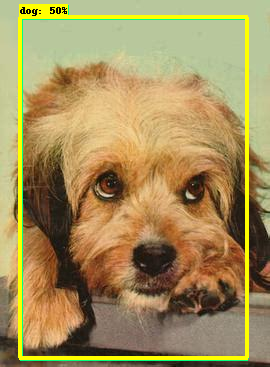

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus:
    #tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/gdrive/MyDrive/Termwork/dataset/train/dogs_095.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/gdrive/MyDrive/Termwork/my_model/created_model/model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/gdrive/MyDrive/Termwork/dataset/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


# TFLITE conversion

TensorFlow Lite is a set of tools that enables on-device machine learning by helping developers run their models on mobile, embedded, and IoT devices.

[Reference](https://www.tensorflow.org/lite/guide)

In [ ]:
print(tf.__version__)
print(help(tf.lite.TFLiteConverter))

2.7.0
Help on class TFLiteConverterV2 in module tensorflow.lite.python.lite:

class TFLiteConverterV2(TFLiteFrozenGraphConverterV2)
 |  TFLiteConverterV2(funcs, trackable_obj=None)
 |  
 |  Converts a TensorFlow model into TensorFlow Lite model.
 |  
 |  Attributes:
 |    optimizations: Experimental flag, subject to change. Set of optimizations to
 |      apply. e.g {tf.lite.Optimize.DEFAULT}. (default None, must be None or a
 |      set of values of type `tf.lite.Optimize`)
 |    representative_dataset: A generator function used for integer quantization
 |      where each generated sample has the same order, type and shape as the
 |      inputs to the model. Usually, this is a small subset of a few hundred
 |      samples randomly chosen, in no particular order, from the training or
 |      evaluation dataset. This is an optional attribute, but required for full
 |      integer quantization, i.e, if `tf.int8` is the only supported type in
 |      `target_spec.supported_types`. Refer t

In [ ]:
%cd /content/gdrive/MyDrive/Termwork/tflite_converted

/content/gdrive/MyDrive/Termwork/tflite_converted


**Load the model created and using the tflite converter API , the model is converted to model.tflite extensions.**

ops used (When using a TensorFlow Lite model that has been converted with support for select TensorFlow ops, the client must also use a TensorFlow Lite runtime that includes the necessary library of TensorFlow ops.)

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(PATH_TO_SAVED_MODEL)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

19746780

# Convert to a C array

As the training JOB and conversion of model has been done, it is now time to run it on the Edge devices. 

For the most of the modern Microcontrollers and the Devices , the firmware is developed in embedded c only (as the compaitble c++ libraires are available) .

TensorFlow Lite for Microcontrollers is written in C++ 11 and requires a 32-bit platform. It has been tested extensively with many processors based on the Arm Cortex-M Series architecture, and has been ported to other architectures including ESP32. The framework is available as an Arduino library. It can also generate projects for development environments such as Mbed. It is open source and can be included in any C++ 11 project.

To run these ML models in compatible with these microcontrollers, the models are converted to binary using the xxd api.

[Reference](https://www.tensorflow.org/lite/microcontrollers)

In [ ]:
!apt-get install xxd

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

cd to the tflite -> directory and running the below command creates a model_data.cc file

In [ ]:
!xxd -i converted_model.tflite > model_data.cc

In [ ]:
!cat model_data.cc

Output hidden; open in https://colab.research.google.com to view.

The following snipet shows a sample c++ file to load the model for a sample applications 

```
#includes<camera_drivers>
#includes<tflite libraries>
#includes"model_data.cc"
#include<other_dependencies>

void setup()
{
  // Map the model
  model = tflite::GetModel(model_data);
  // loading the tflite ops resolver
   tflite::ops::micro::AllOpsResolver resolver;
  // Allocate memory from the tensor_arena for the model's tensors.
  TfLiteStatus allocate_status = interpreter->AllocateTensors();

}

void loop()
{
  get_image();

  run_an_inference(using_the_interpeter->pointer_to_the_captured_image);

  TfLiteTensor* output = interpreter->output(0);

  print(the_score);

}
```

Example applications

1. ESP32-cam based person_detection 

![image](https://user-images.githubusercontent.com/59637425/152485454-96c9d98e-5ffc-452a-921f-6b5ba50f9cdb.png)

[Reference](https://github.com/tensorflow/tflite-micro/tree/main/tensorflow/lite/micro/examples/person_detection) 


# References

1. https://www.tensorflow.org/lite/examples/object_detection/overview
2. https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html

3. Quantanizing the model - https://www.tensorflow.org/lite/performance/post_training_quantization

4. This repo provides few examples of microcontroller based TFlite projects (https://github.com/tensorflow/tflite-micro/tree/main/tensorflow/lite/micro/examples) 

5. Papers and Publications on TinyML (https://github.com/gigwegbe/tinyml-papers-and-projects)

6. *TinyML - Machine Learning with TensorFlow Lite on
Arduino and Ultra-Low-Power Microcontroller - Pete Warden and Daniel Situnayake O’Reilly Publications*



#CONCLUSION

### Final INFERENCES FROM THE ABOVE PROJECT

1. The custom object detector was modeled using the tensorflow2 objectdetection api under the research category, using the transfer learning techinques from the SSD_MOBILENET_V2_320x320.
2. Later the same created model was used to run a inference an custom images.
3. The model showed a confidence level of 58 -60 % on some images.
4. Later the model was converted to tflite using the pythonAPI
5. tflite model was converted to the c binary which is portable to tflite c++ libraries.

### Followups

1. The model after conversion was found to be in large size, which need to quantanized from further studies
2. The accuracy of the model need to be increased further by increasing the number of images in the dataset and run the maxmimum num of epochs.
3. With further studies the objective is to make and run inferences in the edge devices, 

An attempt was made to make a custom object detection for Microcontrollers/Edge devices. 



# GitRepo of the project with all the datas

https://github.com/Bggopal/Custom_object_detection_for_edgedevices.git